<a href="https://colab.research.google.com/github/nhysmith/4650_Stock_Project/blob/main/CS_4650_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 18.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


**Week 2**

This week I continued trying to understand the basics of the stock market.

I bought stock from 2 new companies, and some from NVIDIA, a company I invested in week one. I wanted to piggyback off of last week's strategy, which was to read some stock market publications, subreddits and any other relevant material to find individual stocks to analyze and then I looked at the overall change in stock price over the last year. Lowes and Amazon both stood out to me so I decided to compare them aginst the 3 previous companies I traded.

In [3]:

import yfinance as yf

In [4]:
nvda= yf.download('NVDA', period='1y')
tsla= yf.download('TSLA', period='1y')
ulta= yf.download('ULTA', period='1y')
amazon = yf.download('AMZN', period='1y')
lowes = yf.download('LOW', period='1y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Last week I bought 5 shares of TSLA, 5 shares of ULTA, and 10 shares of NVDA.Both TSLA and NVDA's closing prices had dipped a little on Thursday from their highest values for the week, but I read that the week of Thanksgiving is a historically not great week for trading, so I decided not to sell anything this week. 


In [23]:
nvdaW1= yf.download('NVDA',  start="2021-11-10", end="2021-11-24")
tslaW1= yf.download('TSLA',  start="2021-11-10", end="2021-11-24")
ultaW1= yf.download('ULTA',  start="2021-11-10", end="2021-11-24")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
import altair as alt

nvdaPriceW1 = alt.Chart(nvdaW1.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

nvdaPriceW1

alt.Chart(...)

In [26]:
tslaPriceW1 = alt.Chart(tslaW1.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

tslaPriceW1

alt.Chart(...)

In [27]:
ultaPriceW1 = alt.Chart(ultaW1.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

ultaPriceW1

alt.Chart(...)

In [5]:

nvdaPrice = alt.Chart(nvda.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

tslaPrice = alt.Chart(tsla.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

ultaPrice = alt.Chart(ulta.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

amznPrice = alt.Chart(amazon.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)

lowesPrice = alt.Chart(lowes.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date','Open','Close','High','Low','Volume']
).properties(
    width=600,
    height=200
)


When I looked at the closing prices for all five companies all the closing values looked to be declining.




In [6]:
nvdaPrice

alt.Chart(...)

In [7]:
tslaPrice

alt.Chart(...)

In [8]:
ultaPrice

alt.Chart(...)

In [9]:
amznPrice

alt.Chart(...)

In [10]:
lowesPrice

alt.Chart(...)

I based the following data analysis after Jonas Sandoval's Week 1 notebook
[Jonas's notebook](https://github.com/JMSandoval87/StockAnalysis/blob/main/stock-analysis.ipynb)

In [11]:
from pandas_datareader import data as pdr
yf.pdr_override()
yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
Stocks = ['TSLA', 'ULTA', 'LOW', 'AMZN', 'NVDA']

end = datetime.fromisoformat('2021-11-25')
start = datetime.fromisoformat('2018-11-25')

Tesla = DataReader('TSLA', start, end)
Ulta = DataReader('ULTA', start, end)
Lowes = DataReader('LOW', start, end)
Amazon = DataReader('AMZN', start, end)
Nvidia = DataReader('NVDA', start, end)

df = pd.DataFrame()
data = []
for symbol in Stocks:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


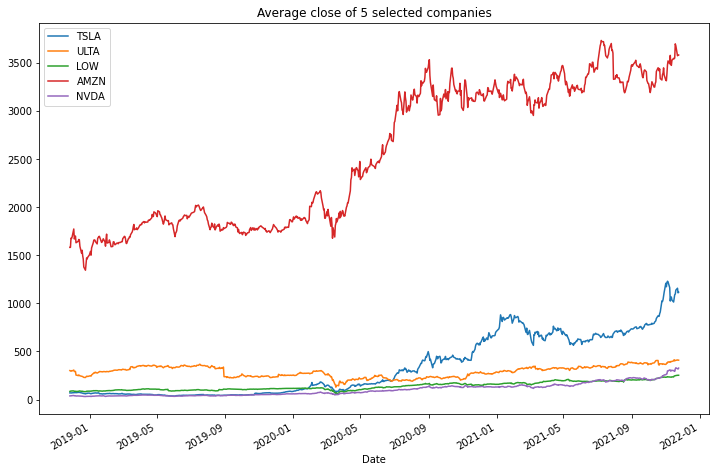

In [13]:
Tesla['Adj Close'].plot(label = 'TSLA', figsize = (12,8))
Ulta['Adj Close'].plot(label = 'ULTA')
Lowes['Adj Close'].plot(label = 'LOW')
Amazon['Adj Close'].plot(label = 'AMZN')
Nvidia['Adj Close'].plot(label = "NVDA")
plt.title('Average close of 5 selected companies')
plt.legend()

In [21]:


df.tail()



,TSLA,ULTA,LOW,AMZN,NVDA
Date,,,,,
2021-11-18,1096.380005,405.649994,247.380005,3696.060059,316.750000
2021-11-19,1137.060059,407.709991,249.520004,3676.570068,329.850006
2021-11-22,1156.869995,411.769989,252.350006,3572.570068,319.559998
2021-11-23,1109.030029,408.929993,251.910004,3580.040039,317.459991
2021-11-24,1116.000000,409.559998,252.630005,3580.409912,326.739990


In [22]:
df.max()

TSLA    1229.910034
ULTA     413.859985
LOW      252.630005
AMZN    3731.409912
NVDA     329.850006
dtype: float64

In [16]:
print("More details about the data.")
df.describe()

More details about the data.


,TSLA,ULTA,LOW,AMZN,NVDA
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,343.370428,289.031812,139.605250,2544.798238,103.757215
std,311.758638,58.514841,43.376494,724.807998,65.486178
min,35.793999,128.520004,63.270363,1343.959961,31.570570
25%,62.277499,237.959995,102.527380,1819.242493,45.030080
50%,176.862000,292.670013,124.193539,2465.820068,87.870392
75%,649.864990,338.607491,172.687103,3242.717468,137.841373
max,1229.910034,413.859985,252.630005,3731.409912,329.850006


In [17]:
rets = df.pct_change(periods=3)
corr = rets.corr()
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk v Returns')
tables = pd.DataFrame(data=d)
tables   

Table: Risk v Returns


,Risk,Expected Returns
TSLA,0.075304,0.013961
ULTA,0.054024,0.002797
LOW,0.039897,0.005069
AMZN,0.032285,0.003697
NVDA,0.048033,0.009627


Text(0, 0.5, 'SD')

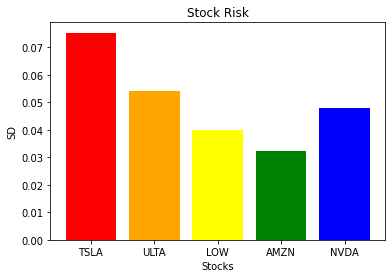

In [18]:
plt.bar(rets.columns, rets.std(), color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title("Stock Risk")
plt.xlabel("Stocks")
plt.ylabel("SD")

Text(0, 0.5, 'Returns')

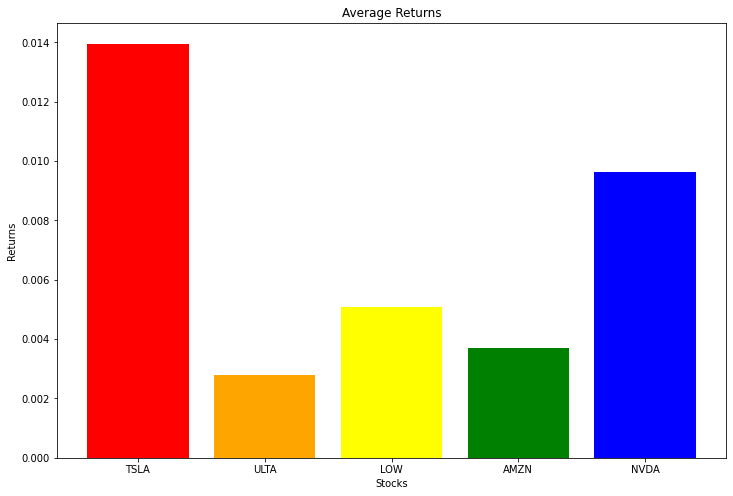

In [19]:
plt.figure(figsize=(12, 8))
plt.bar(rets.columns, rets.mean(), color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title("Average Returns")
plt.xlabel("Stocks")
plt.ylabel("Returns")

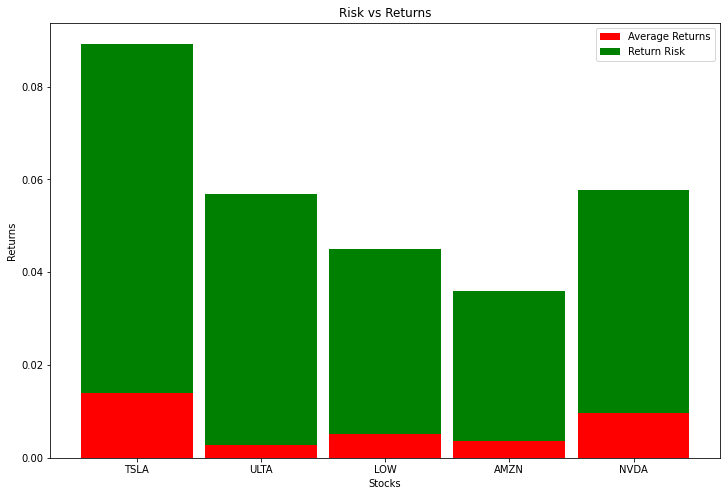

In [20]:
Stocks = ['TSLA', 'ULTA', 'LOW', 'AMZN', 'NVDA']
ind = [x for x, _ in enumerate(Stocks)]
plt.figure(figsize=(12, 8))
plt.bar(ind, rets.mean(), width=0.9, label='Average Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Return Risk', color='g', bottom=rets.mean())

plt.xticks(ind, Stocks)
plt.ylabel("Returns")
plt.xlabel("Stocks")
plt.legend(loc="upper right")
plt.title('Risk vs Returns')
plt.show()

Although the ULTA stock didn't decrease in value, I didn't buy any more shares this week because it didn't have a promising looking risk/reward benefit. I also decided against TSLA because there was some fluctuation in price this week, and this company was the riskiest overall. Amazon surprisingly to me had the lowest risk so I decided to buy some shares. I was happy with both Lowes and NVDIA's risk-return ratio, so I bought shares of bought.

Originally I meant to buy 10 shares of Lowes, 10 shares of Amazon, and 5 shares of NVDIA, my trades didn't initially go through so in the spirit of Black Friday, I hurriedly re-bought all the shares again only to end up with both sets of trades eventually going through.